# Exam MVE080 2021-12-15

In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy.interpolate import interp2d
%matplotlib inline

## Task 1

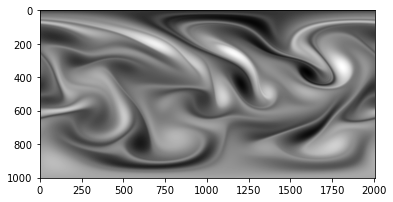

In [2]:
#load image as array
img = mpimg.imread('vorticity.png')
#display the image
plt.imshow(img, cmap = 'gray')

## Task 2

In [3]:
#cubehelix colormap
cubehelix_cmap = sns.cubehelix_palette(start = 3, rot =-0.5, gamma = 2, hue = .8, light = .9, dark = .20, reverse = True, as_cmap = True)
#save new image
plt.imsave('vorticity_with_cmap.png', img, cmap = cubehelix_cmap)

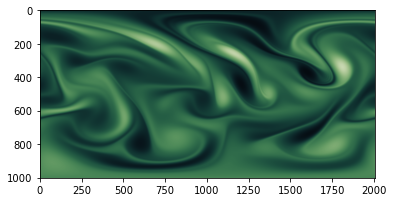

In [4]:
#load image
img2 = mpimg.imread('vorticity_with_cmap.png')
#display image
plt.imshow(img2)

## Task 3

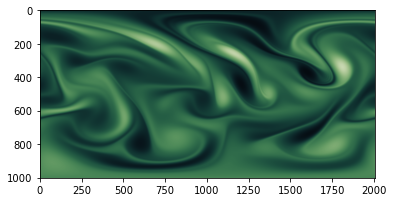

In [5]:
img2 = mpimg.imread('vorticity_with_cmap.png')
plt.imshow(img2, cmap = "gray")

According to the documentation for *matplotlib.pyplot.imshow*, the *cmap* parameter is ignored for RGB(A) data. In our case, the *img2* is an array of RGB data, therefore using the parameter *cmap = 'gray'* will not make the image gray. However, *img* is a single-channel bitmap and therefore *cmap = 'gray'* could be performed because it contained 2D scalar data. To convert the RGB image to grayscale we can use the standard RGB to grayscale conversion formula *np.dot(img2, [0.2989, 0.5870, 0.1140])*.

## Task 4

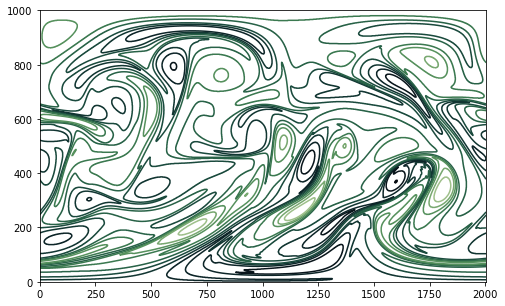

In [6]:
fig, ax = plt.subplots(figsize=(8,5))
ax.contour(img, levels = 10, cmap = cubehelix_cmap)

### Alternative solution using interpolation:

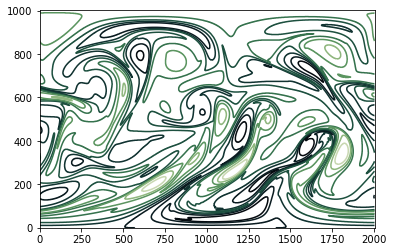

In [7]:
x = np.arange(0., len(img[0]))
y = np.arange(0., len(img))

#set 10 levels to be shown
contour_breaks = 10
ticks = np.linspace(img.min(), img.max(), contour_breaks, endpoint=True)

fig = plt.figure()
axes = fig.add_subplot()
#create function
f = interp2d(x, y, img)
x2 = np.arange(0., len(img[0]))
y2 = np.arange(0., len(img))
z = f(x2, y2)
axes.contour(x2, y2, z, ticks[1:-1], cmap=cubehelix_cmap)
plt.show()